# Graded Challenge 2

**Nama : Achmad Naufal Wijaya Jofananda**

**Batch : 002**

_Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Classification terutama Logistic Regression dan SVM._

---

## Dataset Description

Unduh dataset yang akan digunakan [disini](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).

## Assignment Objectives

*Graded Challenge 2* ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

---

## **Import Library**

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns

#Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report, roc_auc_score

## **Data Loading**

In [52]:
df = pd.read_csv("/content/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [53]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [54]:
df.keys()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [55]:
df.shape

(145460, 23)

We can see that there are $23$ columns and $145460$ rows inside the datasets

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

From the **df.info()** above, we can see that the data only have $2$ types of data, *float* numeric and *categorical*

Since we have **RainTomorrow** as our target variable, let's see its description

In [57]:
df[['RainTomorrow']].describe().T

,count,unique,top,freq
RainTomorrow,142193,2,No,110316


In [58]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [59]:
(df['RainTomorrow'].value_counts()/len(df))*100

No     75.84
Yes    21.91
Name: RainTomorrow, dtype: float64

We can see that there is only 2 unique value from our target variable and "No" has appear for $110316$ times / 75.84% and "Yes" appear for $31877$ times / 21.91%. 

Next let's see our features variable, the numeric features and categorical features

In [60]:
numerical_cols = list(df.select_dtypes("number").columns)
df[numerical_cols].describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975,12.194,6.39849,-8.5,7.6,12,16.9,33.9
MaxTemp,144199,23.2213,7.11905,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199,2.36092,8.47806,0,0,0,0.8,371
Evaporation,82670,5.46823,4.1937,0,2.6,4.8,7.4,145
Sunshine,75625,7.61118,3.78548,0,4.8,8.4,10.6,14.5
WindGustSpeed,135197,40.0352,13.6071,6,31,39,48,135
WindSpeed9am,143693,14.0434,8.91538,0,7,13,19,130
WindSpeed3pm,142398,18.6627,8.8098,0,13,19,24,87
Humidity9am,142806,68.8808,19.0292,0,57,70,83,100
Humidity3pm,140953,51.5391,20.7959,0,37,52,66,100


Pretty good numbers there, now let's see our categorical features

In [61]:
categorical_cols = list(df.select_dtypes(object).drop(columns = ['RainTomorrow']).columns)
df[categorical_cols].describe().T

,count,unique,top,freq
Date,145460,3436,2013-09-11,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319


Since "Date" column has an object type of data, we need to change it into datetime types of data

In [62]:
#There don't seem to be any error in dates so parsing values into datetime
df['Date']= pd.to_datetime(df["Date"])
#Creating a collumn of year
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Now, after we know our data

Let's go to our next step, **Data Cleaning**

Shall we?

## **Data Cleaning**

### **Missing Value**

In [64]:
#show null data
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64


In [65]:
# Getting rid of the columns with objects which will not be used in our model:
df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


After we drop the column we won't use in the future

Let's fill the missing values with ***mean***

In [66]:
# And we need to replace NaN values with mean values of each column:
df.fillna(df.mean(), inplace=True)
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,5.47,7.61,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00,4.51,16.9,21.8,No,No,2008,12,1
1,7.4,25.1,0.0,5.47,7.61,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.45,4.51,17.2,24.3,No,No,2008,12,2
2,12.9,25.7,0.0,5.47,7.61,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.45,2.00,21.0,23.2,No,No,2008,12,3
3,9.2,28.0,0.0,5.47,7.61,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.45,4.51,18.1,26.5,No,No,2008,12,4
4,17.5,32.3,1.0,5.47,7.61,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00,8.00,17.8,29.7,No,No,2008,12,5


In [67]:
#show null data
print(df.isnull().sum())

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64


Looks like we still have missing values there

There is no option than drop it, so let's drop it

In [68]:
df.dropna(inplace=True)
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,5.47,7.61,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00,4.51,16.9,21.8,No,No,2008,12,1
1,7.4,25.1,0.0,5.47,7.61,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.45,4.51,17.2,24.3,No,No,2008,12,2
2,12.9,25.7,0.0,5.47,7.61,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.45,2.00,21.0,23.2,No,No,2008,12,3
3,9.2,28.0,0.0,5.47,7.61,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.45,4.51,18.1,26.5,No,No,2008,12,4
4,17.5,32.3,1.0,5.47,7.61,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00,8.00,17.8,29.7,No,No,2008,12,5


In [69]:
#show null data
print(df.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64


In [70]:
df.shape

(140787, 21)

Seems like there is no missing values left

So let's go to the next job, check if there is any duplicated rows

### **Duplicated Rows**

In [71]:
df.duplicated().any()

False

Since there is no duplicated rows inside the datasets. We're ready to go

## **Data Exploration**

In data exploration, we want to find the correlation between our target variable and other features variable 

In [72]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,5.47,7.61,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00,4.51,16.9,21.8,No,No,2008,12,1
1,7.4,25.1,0.0,5.47,7.61,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.45,4.51,17.2,24.3,No,No,2008,12,2
2,12.9,25.7,0.0,5.47,7.61,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.45,2.00,21.0,23.2,No,No,2008,12,3
3,9.2,28.0,0.0,5.47,7.61,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.45,4.51,18.1,26.5,No,No,2008,12,4
4,17.5,32.3,1.0,5.47,7.61,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00,8.00,17.8,29.7,No,No,2008,12,5


In [73]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00,140787.00
mean,12.18,23.24,2.35,5.47,7.62,39.97,13.99,18.63,68.83,51.45,1017.65,1015.26,4.44,4.50,16.99,21.69,2012.76,6.40,15.71
std,6.39,7.11,8.47,3.18,2.74,13.13,8.85,8.72,18.96,20.55,6.75,6.68,2.28,2.11,6.48,6.87,2.54,3.43,8.80
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,2007.00,1.00,1.00
25%,7.60,17.90,0.00,4.00,7.61,31.00,7.00,13.00,57.00,37.00,1013.50,1011.00,3.00,4.00,12.30,16.70,2011.00,3.00,8.00
50%,12.00,22.70,0.00,5.47,7.61,39.00,13.00,18.66,70.00,51.54,1017.65,1015.26,4.45,4.51,16.80,21.30,2013.00,6.00,16.00
75%,16.80,28.20,0.80,5.47,8.70,46.00,19.00,24.00,83.00,65.00,1021.80,1019.40,6.00,6.00,21.50,26.30,2015.00,9.00,23.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,2017.00,12.00,31.00


Before we go to our **EDA**, Let's change our categorical value to numerical value such as value in **RainTomorrow** and **RainToday**

In [74]:
# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
df.RainToday = [1 if each == 'Yes' else 0 for each in df.RainToday]
df.RainTomorrow = [1 if each == 'Yes' else 0 for each in df.RainTomorrow]
df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
103478,3.0,18.1,0.0,0.80,9.80,24.0,9.0,15.0,80.0,50.0,1025.00,1021.40,0.00,6.00,11.8,17.5,0,0,2011,8,14
85557,18.1,23.4,8.2,8.40,0.20,37.0,15.0,15.0,55.0,54.0,1022.10,1020.20,7.00,7.00,21.3,21.3,1,0,2012,10,28
93184,23.9,28.9,0.0,5.47,7.61,37.0,11.0,17.0,97.0,99.0,1016.20,1013.70,4.45,4.51,26.8,24.1,0,1,2017,3,22
126765,6.0,25.5,0.0,5.47,7.61,24.0,7.0,7.0,91.0,32.0,1017.65,1015.26,4.45,4.51,16.7,24.9,0,0,2017,4,20
98921,15.4,27.5,0.0,5.47,7.61,37.0,6.0,20.0,46.0,42.0,1016.10,1015.50,4.45,4.51,22.6,25.5,0,0,2015,11,12


Let's explore our target variable first

In [75]:
df['RainTomorrow'].isnull().sum()

0

We can see that there is no missing values there

In [76]:
df['RainTomorrow'].nunique()

2

There is $2$ unique values inside the **RainTomorrow** column

In [77]:
df['RainTomorrow'].unique()

array([0, 1])

We can see that there is 2 value $0$ and $1$ inside the column

- $1$ represents "Yes" and $0$ represents "No"

In [78]:
df['RainTomorrow'].value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [79]:
(df['RainTomorrow'].value_counts()/len(df))*100

0    77.84
1    22.16
Name: RainTomorrow, dtype: float64

From above, we can see that $0$ has more data than $1$, which is 77.84 % for "No" and 22.16 % for "Yes"

Now let's see the graph

Rectangle(xy=(-0.4, 0), width=0.8, height=109586, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=31201, angle=0)


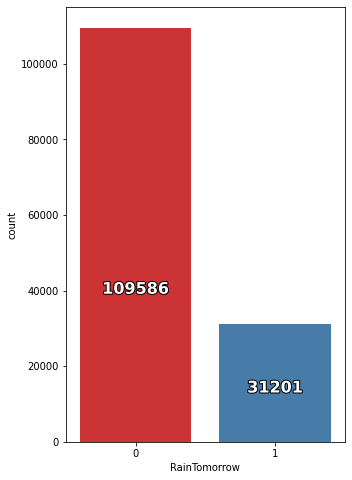

In [80]:
f, ax = plt.subplots(figsize=(5, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
for p in ax.patches:
    print(p)
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()/3), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'white',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")]
    )
plt.show()

We can see that the differents between "No" value and "Yes" value. So different

### **Correlation Check**

In [81]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,5.47,7.61,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00,4.51,16.9,21.8,0,0,2008,12,1
1,7.4,25.1,0.0,5.47,7.61,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.45,4.51,17.2,24.3,0,0,2008,12,2
2,12.9,25.7,0.0,5.47,7.61,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.45,2.00,21.0,23.2,0,0,2008,12,3
3,9.2,28.0,0.0,5.47,7.61,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.45,4.51,18.1,26.5,0,0,2008,12,4
4,17.5,32.3,1.0,5.47,7.61,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00,8.00,17.8,29.7,0,0,2008,12,5


In [82]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month',
       'Day'],
      dtype='object')

In [83]:
df_corr_prices = ['RainTomorrow','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day']
df_new = df[df_corr_prices]
df_new.head()

,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,0,13.4,22.9,0.6,5.47,7.61,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00,4.51,16.9,21.8,0,2008,12,1
1,0,7.4,25.1,0.0,5.47,7.61,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.45,4.51,17.2,24.3,0,2008,12,2
2,0,12.9,25.7,0.0,5.47,7.61,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.45,2.00,21.0,23.2,0,2008,12,3
3,0,9.2,28.0,0.0,5.47,7.61,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.45,4.51,18.1,26.5,0,2008,12,4
4,0,17.5,32.3,1.0,5.47,7.61,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00,8.00,17.8,29.7,0,2008,12,5


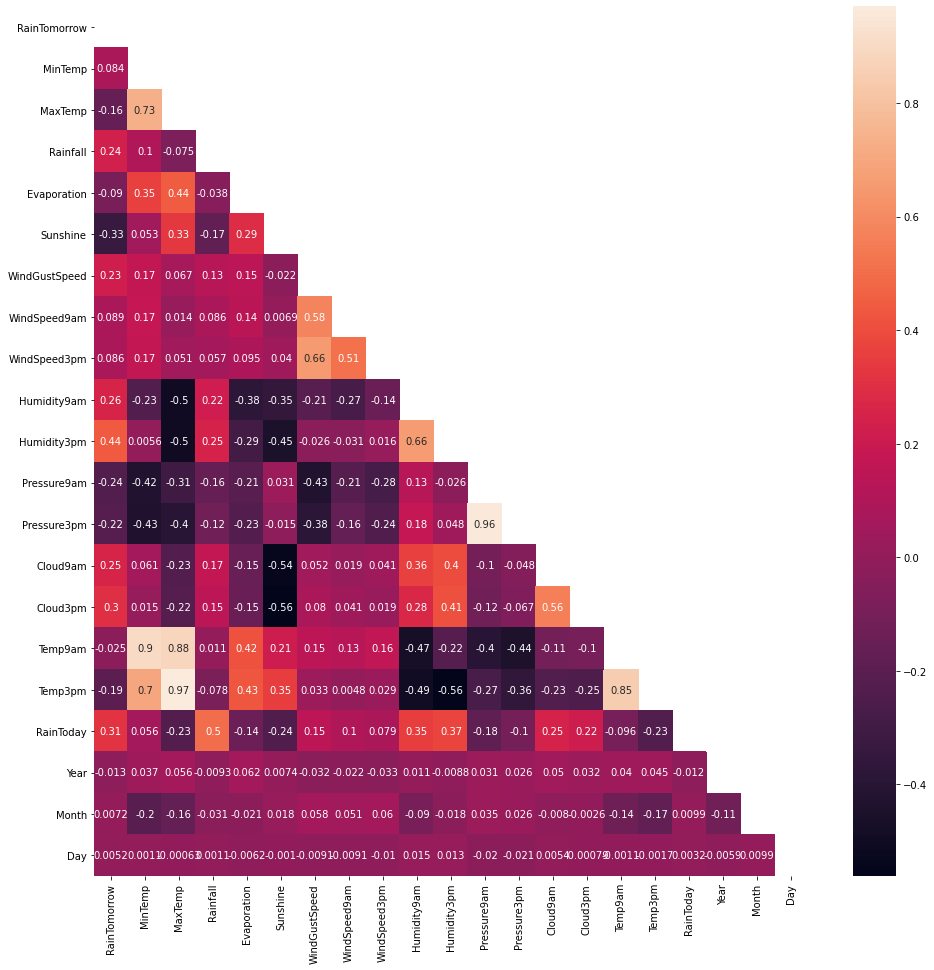

In [84]:
#plotting heatmap with correlation on df_new dataframe
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

We can see that there is some variables that don't have correlation with our target variables. So we can drop it

In [85]:
df_col = ['MinTemp', 'MaxTemp',  'Evaporation', 'Sunshine',
       'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month',
       'Day']
df = df.drop(df_col,axis=1)
print(df.shape)
df.head()

(140787, 8)


,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,44.0,71.0,22.0,8.00,4.51,0,0
1,0.0,44.0,44.0,25.0,4.45,4.51,0,0
2,0.0,46.0,38.0,30.0,4.45,2.00,0,0
3,0.0,24.0,45.0,16.0,4.45,4.51,0,0
4,1.0,41.0,82.0,33.0,7.00,8.00,0,0


Since we already have the data, let's go to **Data Preprocessing**

## **Data Preprocessing**

In [86]:
df_corr_RT = ['RainTomorrow','Rainfall', 
       'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm','RainToday']
df = df[df_corr_RT]
df.head()

,RainTomorrow,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,0,0.6,44.0,71.0,22.0,8.00,4.51,0
1,0,0.0,44.0,44.0,25.0,4.45,4.51,0
2,0,0.0,46.0,38.0,30.0,4.45,2.00,0
3,0,0.0,24.0,45.0,16.0,4.45,4.51,0
4,0,1.0,41.0,82.0,33.0,7.00,8.00,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RainTomorrow   140787 non-null  int64  
 1   Rainfall       140787 non-null  float64
 2   WindGustSpeed  140787 non-null  float64
 3   Humidity9am    140787 non-null  float64
 4   Humidity3pm    140787 non-null  float64
 5   Cloud9am       140787 non-null  float64
 6   Cloud3pm       140787 non-null  float64
 7   RainToday      140787 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 14.7 MB


In [88]:
df.shape

(140787, 8)

Let's check again our correlation

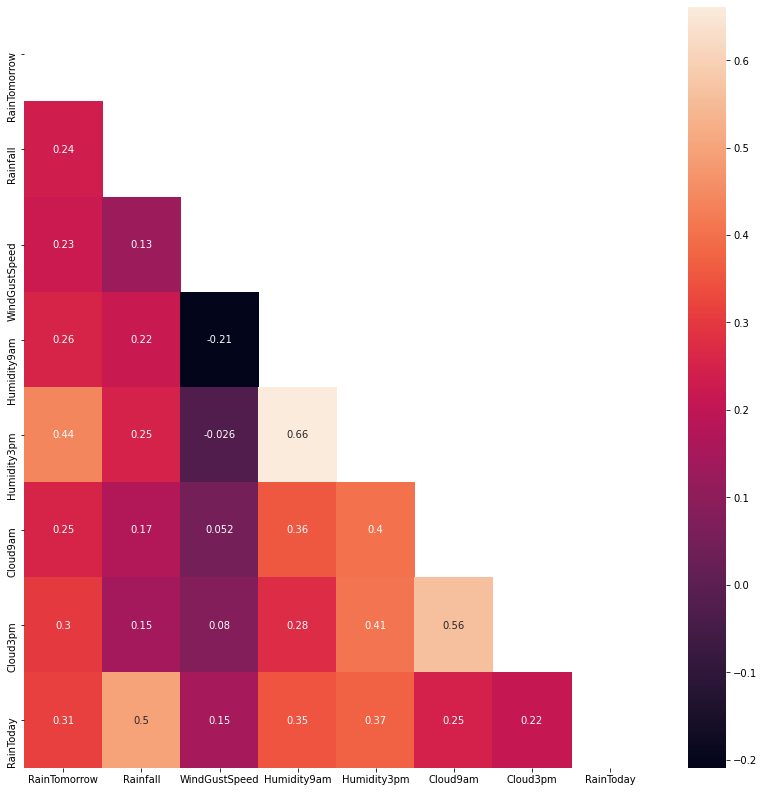

In [89]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True, mask=np.triu(df.corr()))

Not a good correlation, but let's use it since we don't have another column that satisfy our score. We decide to put 0.2 as our correlation score's threshold here

### **Preparing Features Variable and Target Variable**

In [90]:
X = df.drop(columns = ['RainTomorrow'], axis = 1).values
y = df['RainTomorrow'].values

### **Split Data**

Split into 80% train data, and 20% test data.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(len(X_train)/len(X), len(X_test)/len(X))

0.7999957382428775 0.20000426175712246


### **Scaling**

In [92]:
scaler = StandardScaler()

In [93]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Define Model**

We want to use Logistic Regression and SVC as our model

In [94]:
log_reg = LogisticRegression()
svc_model = SVC(kernel='rbf', C = 1)

## **Training Model (Logistic Regression)** 

In [95]:
#train the model with our data train
model_logreg = log_reg.fit(X_train, y_train)

## **Training Model (SVC)** 

In [98]:
model_svc = svc_model.fit(X_train, y_train)
model_predict_svc = model_svc.predict(X_test)

## **Model Evaluation**

In [96]:
model_predict = model_logreg.predict(X_test)
model_conf_matrix = confusion_matrix(y_test, model_predict)
model_acc_score = accuracy_score(y_test, model_predict)
print("Confusion Matrix : ")
print(model_conf_matrix)
print("------------------------------------------")
print("Logistic Regression's Accuracy:",round(model_acc_score*100, 0))
print("------------------------------------------")
print(classification_report(y_test,model_predict))

Confusion Matrix : 
[[20697  1221]
 [ 3326  2914]]
------------------------------------------
Logistic Regression's Accuracy: 84.0
------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21918
           1       0.70      0.47      0.56      6240

    accuracy                           0.84     28158
   macro avg       0.78      0.71      0.73     28158
weighted avg       0.83      0.84      0.83     28158



From our Logistic Regression model, we can see that
- There is 20,697 data for being confirmed True Positive (so the predicted RainTomorrow is True)
- There is 2,914 data for being confirmed True Negative (so the predicted Not RainTomorrow is True)
- There is 1,221 data for being confirmed False Positive (so the predicted RainTomorrow is Wrong)
- There is 3,326 data for being confirmed False Negative (so the predicted Not RainTomorrow is Wrong)

The accuracy score of our model is 84%

In [97]:
df_predictedLR = pd.DataFrame({'Actual Values':y_test,
                     'Prediction' :model_predict
                    })
df_predictedLR.sample(10)

,Actual Values,Prediction
15896,0,0
8993,0,0
13652,1,1
13117,0,0
6532,1,0
20148,0,0
14852,1,0
3694,0,0
9432,0,0
6013,1,1


In [99]:
model_conf_matrix_svc = confusion_matrix(y_test, model_predict_svc)
model_acc_score_svc = accuracy_score(y_test, model_predict_svc)
print("Confusion Matrix : ")
print(model_conf_matrix_svc)
print("------------------------------------------")
print("SVC Accuracy : ",round(model_acc_score_svc*100, 0))
print("------------------------------------------")
print(classification_report(y_test,model_predict_svc))

Confusion Matrix : 
[[21079   839]
 [ 3624  2616]]
------------------------------------------
SVC Accuracy :  84.0
------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     21918
           1       0.76      0.42      0.54      6240

    accuracy                           0.84     28158
   macro avg       0.81      0.69      0.72     28158
weighted avg       0.83      0.84      0.82     28158



From our SVC model, we can see that
- There is 21,079 data for being confirmed True Positive (so the predicted RainTomorrow is True)
- There is 2,616 data for being confirmed True Negative (so the predicted Not RainTomorrow is True)
- There is 839 data for being confirmed False Positive (so the predicted RainTomorrow is Wrong)
- There is 3,624 data for being confirmed False Negative (so the predicted Not RainTomorrow is Wrong)

The accuracy score of our model is 84%

## **ROC - AUC Graph**

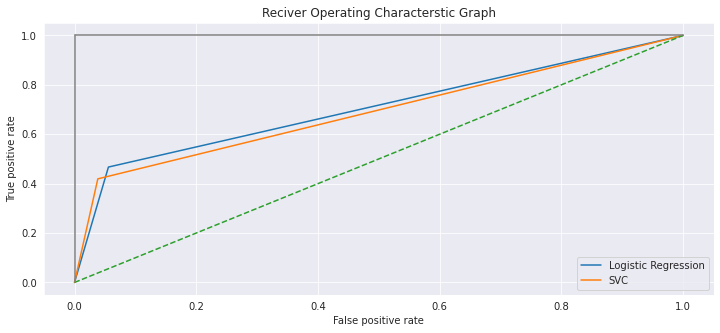

In [101]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,model_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,model_predict_svc)
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
plt.title('Reciver Operating Characterstic Graph')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='SVC')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

From ROC graph above, we can see that Logistic Regression is slightly better than SVC

## **Model Inference**

For this model inference, we want to use our defined X_test before

Since our Logistic Regression is slightly better than our SVC, we will use that algorithm

In [132]:
pred_dum = log_reg.predict(X_test)
AP_dumm = pd.DataFrame({'Actual Values':y_test,
                     'Prediction' :pred_dum,
                     'Error' :y_test-pred_dum
                    })
AP_dumm

,Actual Values,Prediction,Error
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
28153,1,0,1
28154,0,0,0
28155,0,0,0
28156,1,1,0


In [135]:
print("AUC:",roc_auc_score(y_test, pred_dum))

AUC: 0.705639770964504


## **Conclusion**

From this notebook, we can conclude some important things :
- This Rain Dataset has $23$ columns and $145460$ rows 
- The target variable of this dataset is RainTomorrow, which is our main target is to predict the possibility of Tomorrow's Rain
- From our prediction, we know that from LogisticRegression algorithm we get 84% accuracy score and SVC algorithm we get 84% accuracy score too
- But for ROC - AUC graph, we know that LogisticRegression is slightly better than SVC
- For our model inference, we use our defined X_test variable and get a result that our AUC score is about 70.5% which is pretty good